# Mean Residual Value

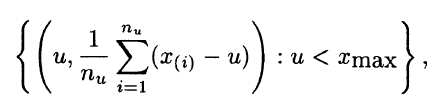

In [38]:
# Ajuste de gpd con libreria evir: Extreme Values in R
# https://cran.r-project.org/web/packages/evir/evir.pdf

#install.packages("heatwaveR")
#install.packages("evir")
library(heatwaveR)
library(evir)

datos <- Algiers
datosMax <- datos[,'tMax']

# Estimo params con Maxima verosimilitud sobre los datos
# Ver consola para detalles:
step <- 0.1
gridU <- seq(min(datosMax), max(datosMax)-5, step)
proms <- rep(NA, length(gridU))
xis   <- rep(NA, length(gridU))
mus   <- rep(NA, length(gridU))

i <- 1
for(t in gridU){
    ajuste <- gpd(datosMax, threshold=t)
    # $par.ests
    # xi         mu 
    # -0.2141458 20.9820117
    datosOverU <- ajuste$data
    proms[i] <- mean(datosOverU - t)
    # Lo guardo en variables
    ests <- ajuste$par.ests
    xis[i] <- ests[1]
    mus[i] <- ests[2]
    i <- i + 1
    # Los datos
#     xgrid <- seq(0,100,0.1)
    # Histograma de TODOS los datos
#     hist(datosOverU, prob=T, col='yellowgreen', xlim=c(0, 50), ylim=c(0, 0.5),
#          main=paste('Ajuste GPD datos\nThreshold @', t, '°C'))
    # Histograma de datos > 30 (por poner una referencia)
    #hist(datos[datos$tMax>35, 'tMax'], prob=T, col=rgb(1,0,0,0.5), add=T)
    # GEV con parametros encontrados arriba
#     lines(xgrid+t, dgpd(xgrid,
#                       xi = xi,
#                       mu = mu),
#           type='l', lwd=3, col='steelblue')
    # $par.ses en vez de $par.ests (no se que es)
    # lines(xgrid, dgev(xgrid,
    #                   xi = ajuste$par.ses[1],
    #                   mu = ajuste$par.ses[2],
    #                   sigma = ajuste$par.ses[3]),
    #       type='l', lwd=3, col='orange')
    # Linea vertical en xi
#     abline(v=mu+t, lwd=3, lty=3, col='orange')
#     legend('topleft', c(paste0('Datos (',length(datosOverU),')'),'Ajuste GPD', 'mu_hat'),
#            lty=c(1,1,3), lwd=3,
#            col=c('yellowgreen', 'steelblue', 'orange'))
    
}


Warning message in log(x):
“NaNs produced”Warning message in log(x):
“NaNs produced”Warning message in log(x):
“NaNs produced”Warning message in sqrt(diag(varcov)):
“NaNs produced”Warning message in sqrt(diag(varcov)):
“NaNs produced”Warning message in sqrt(diag(varcov)):
“NaNs produced”Warning message in sqrt(diag(varcov)):
“NaNs produced”Warning message in sqrt(diag(varcov)):
“NaNs produced”

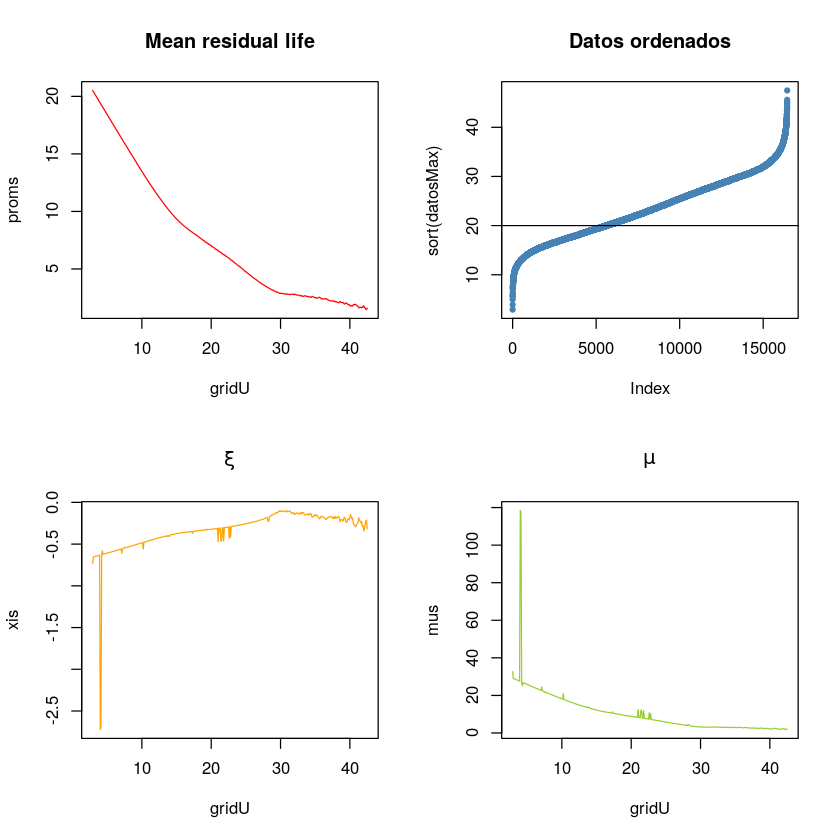

In [41]:
par(mfrow=c(2,2))
plot(gridU, proms, type='l', col='red', main='Mean residual life')
plot(sort(datosMax), main="Datos ordenados", pch=20, col='steelblue')
abline(h=20)
plot(gridU, xis, type='l', col='orange', main=expression(xi))
plot(gridU, mus, type='l', col='yellowgreen', main=expression(mu))

# Lo mismo pero a partir de $u_{0}$ que cumpla hipótesis de Pareto

In [54]:
# Ajuste de gpd con libreria evir: Extreme Values in R
# https://cran.r-project.org/web/packages/evir/evir.pdf

#install.packages("heatwaveR")
#install.packages("evir")
library(heatwaveR)
library(evir)

datos <- Algiers
datosMax <- datos[,'tMax']

# Estimo params con Maxima verosimilitud sobre los datos
# Ver consola para detalles:
step <- 0.1
u_0  <- quantile(datosMax, probs=c(0.80), names=F)
gridU <- seq(u_0, max(datosMax)-5, step)
proms <- rep(NA, length(gridU))
cants <- rep(NA, length(gridU))
xis   <- rep(NA, length(gridU))
mus   <- rep(NA, length(gridU))

i <- 1
for(t in gridU){
    ajuste <- gpd(datosMax, threshold=t)
    # $par.ests
    # xi         mu 
    # -0.2141458 20.9820117
    datosOverU <- ajuste$data
    proms[i] <- mean(datosOverU - t)
    cants[i] <- length(datosOverU)
    # Lo guardo en variables
    ests <- ajuste$par.ests
    xis[i] <- ests[1]
    mus[i] <- ests[2]
    i <- i + 1
    # Los datos
#     xgrid <- seq(0,100,0.1)
    # Histograma de TODOS los datos
#     hist(datosOverU, prob=T, col='yellowgreen', xlim=c(0, 50), ylim=c(0, 0.5),
#          main=paste('Ajuste GPD datos\nThreshold @', t, '°C'))
    # Histograma de datos > 30 (por poner una referencia)
    #hist(datos[datos$tMax>35, 'tMax'], prob=T, col=rgb(1,0,0,0.5), add=T)
    # GEV con parametros encontrados arriba
#     lines(xgrid+t, dgpd(xgrid,
#                       xi = xi,
#                       mu = mu),
#           type='l', lwd=3, col='steelblue')
    # $par.ses en vez de $par.ests (no se que es)
    # lines(xgrid, dgev(xgrid,
    #                   xi = ajuste$par.ses[1],
    #                   mu = ajuste$par.ses[2],
    #                   sigma = ajuste$par.ses[3]),
    #       type='l', lwd=3, col='orange')
    # Linea vertical en xi
#     abline(v=mu+t, lwd=3, lty=3, col='orange')
#     legend('topleft', c(paste0('Datos (',length(datosOverU),')'),'Ajuste GPD', 'mu_hat'),
#            lty=c(1,1,3), lwd=3,
#            col=c('yellowgreen', 'steelblue', 'orange'))
    
}


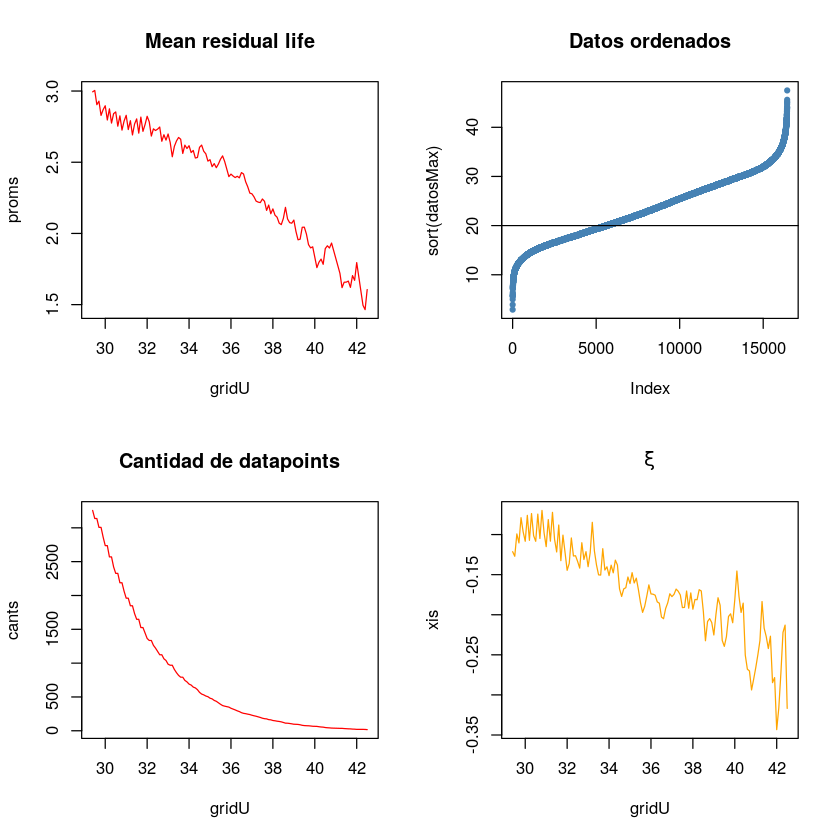

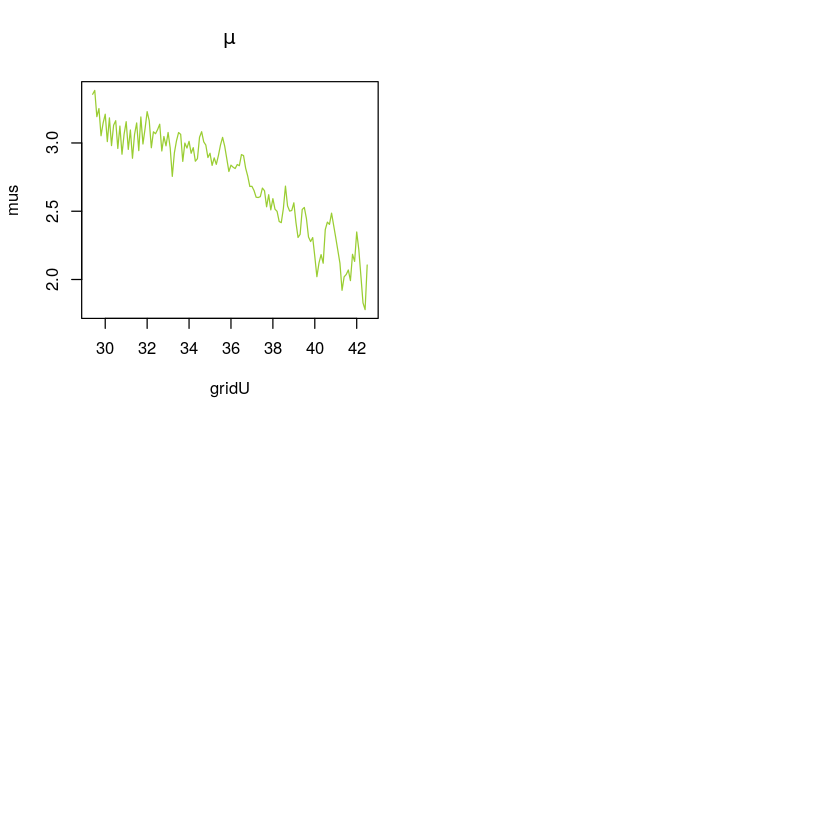

In [55]:
par(mfrow=c(2,2))
plot(gridU, proms, type='l', col='red', main='Mean residual life')
plot(sort(datosMax), main="Datos ordenados", pch=20, col='steelblue')
abline(h=20)
plot(gridU, cants, type='l', col='red', main='Cantidad de datapoints')
plot(gridU, xis, type='l', col='orange', main=expression(xi))
plot(gridU, mus, type='l', col='yellowgreen', main=expression(mu))

Para más data, parte del libro:

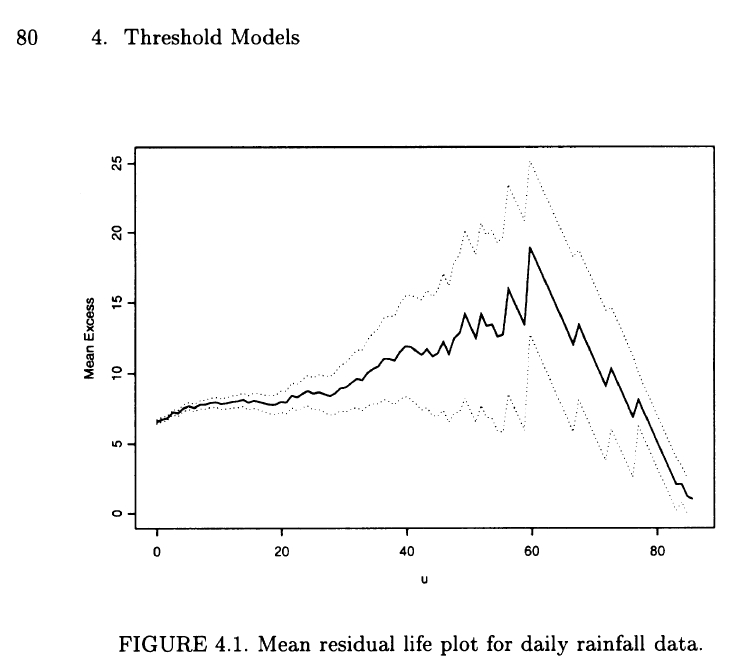
